In [ ]:
from util import fisherztrans,stat_m_e,pair_test,sig,color_inv_alpha
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from faceprf_figure_function import set_figure,set_ax,myviolinplot_ind,myviolinplot_pair,myviolinplot_multi
import pingouin

cms=np.array([[255, 195, 73],[145, 115, 185]])/255 

nsubj = 8
npos = 16
task = ['Digit Task','Face Task']
roi_labels = ['V1','V2','V3','hV4','IOG','pFus','mFus']
nroi = len(roi_labels)
ntask = len(task)
# distance: near vs. far
num_nf=[[0,4],[5,9]]
nf = ['Near','Far']
nsample2 = nsubj * np.max(np.diff(num_nf))
nvertex = 100

data_path = "../data/"

### Four Mechanisms


$$\begin{align}
LFI_{unatt} &= \frac{1}{n\Delta s^2}*\frac{|df_{unatt}|^2}{\underline\lambda_{unatt}}*\Sigma_i\frac{(\frac{df_{unatt}}{|df_{unatt}|}*\xi_i^{unatt})^2}{\hat\lambda_i^{unatt}} \\

LFI_{se} &= \frac{1}{n\Delta s^2}*\frac{|df_{att}|^2}{\underline\lambda_{unatt}}*\Sigma_i\frac{(\frac{df_{unatt}}{|df_{unatt}|}*\xi_i^{unatt})^2}{\hat\lambda_i^{unatt}} \\

LFI_{ms} &= \frac{1}{n\Delta s^2}*\frac{|df_{unatt}|^2}{\underline\lambda_{att}}*\Sigma_i\frac{(\frac{df_{unatt}}{|df_{unatt}|}*\xi_i^{unatt})^2}{\hat\lambda_i^{unatt}} \\

LFI_{srms} &= \frac{1}{n\Delta s^2}*\frac{|df_{unatt}|^2}{\underline\lambda_{unatt}}*\Sigma_i\frac{(\frac{df_{att}}{|df_{att}|}*\xi_i^{att})^2}{\hat\lambda_i^{att}} \\

LFI_{att} &= \frac{1}{n\Delta s^2}*\frac{|df_{att}|^2}{\underline\lambda_{att}}*\Sigma_i\frac{(\frac{df_{att}}{|df_{att}|}*\xi_i^{att})^2}{\hat\lambda_i^{att}} = aLFI_{att}

\end{align}
$$


V1,Far,[np.float64(0.0), np.float64(0.0), np.float64(0.3545), np.float64(0.0438)]
V2,Far,[np.float64(0.0), np.float64(0.0), np.float64(0.0201), np.float64(0.0)]
V3,Far,[np.float64(0.0), np.float64(0.0), np.float64(0.0006), np.float64(0.0)]
hV4,Far,[np.float64(0.0), np.float64(0.0), np.float64(0.0201), np.float64(0.0)]
IOG,Far,[np.float64(0.0), np.float64(0.0), np.float64(0.0001), np.float64(0.0)]
pFus,Far,[np.float64(0.0), np.float64(0.0), np.float64(0.3545), np.float64(0.0)]
mFus,Far,[np.float64(0.0), np.float64(0.0), np.float64(0.1614), np.float64(0.0)]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14872\97266974.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('fig6-separate.pdf', bbox_inches='tight')
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


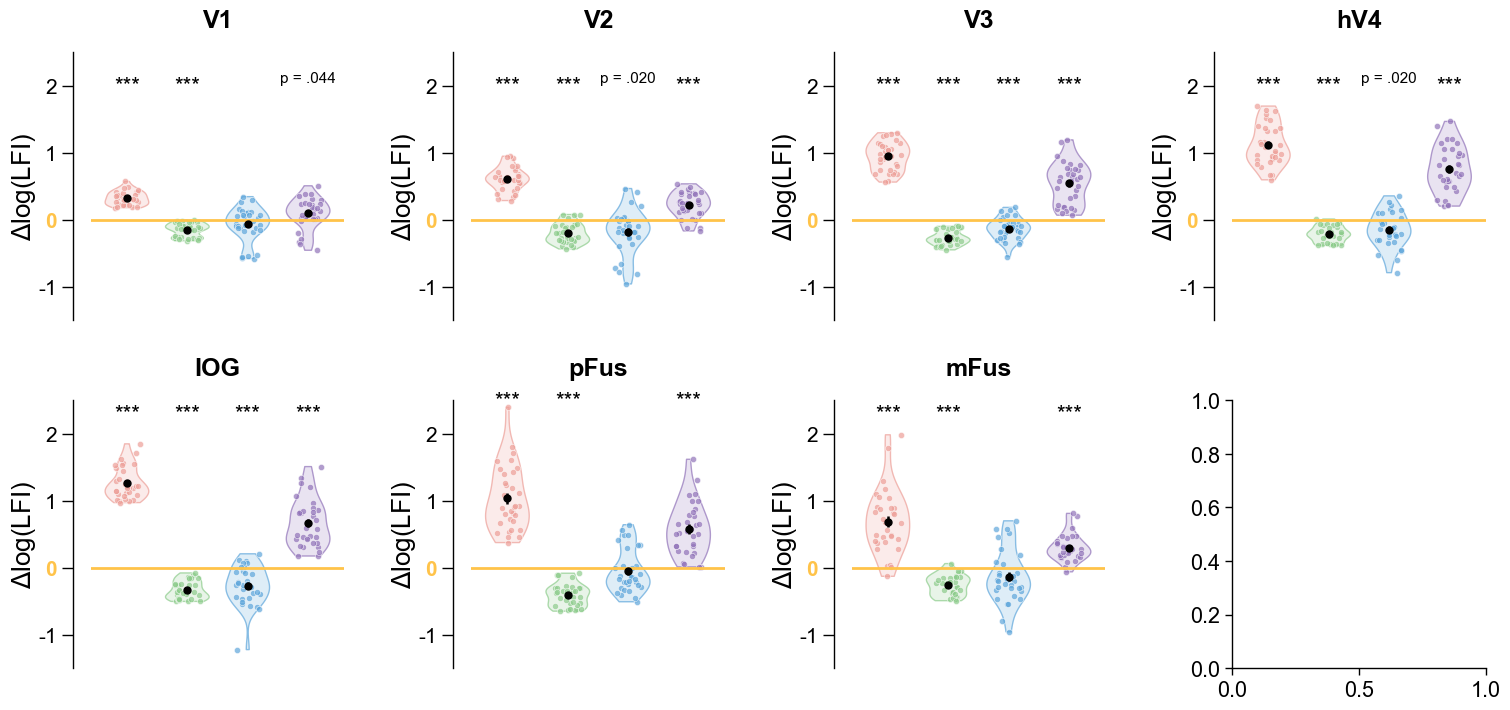

In [3]:
deltaIlog_stw_d_subj = np.load(data_path+'LFI_separate.npz',allow_pickle=True)['deltaIlog_stw_d_subj']

deltaIlog_stw_subj_nf = np.zeros([nsample2,len(num_nf),len(roi_labels),4])*np.nan # 8subjects*4d x nnf x nroi x 4
for i in range(len(num_nf)):
    for roi_i in range(len(roi_labels)):
        for k in range(4):
            a = deltaIlog_stw_d_subj[num_nf[i][0]:num_nf[i][1],:,roi_i,k].flatten()
            deltaIlog_stw_subj_nf[:len(a),i,roi_i,k] = a

# far distance condition
nf_i=1

# test
ps = np.ones([4,7])
for roi_i in range(len(roi_labels)):
    # Significance
    for j in range(4):
        sts=pingouin.wilcoxon(deltaIlog_stw_subj_nf[:,nf_i,roi_i,j],nan_policy='omit')
        ps[j,roi_i] = sts["p-val"].iloc[0]
ps = multipletests(ps.reshape([28]))[1].reshape([4,7])
for roi_i in range(len(roi_labels)):
    print('{},{},{}'.format(roi_labels[roi_i],nf[nf_i],[round(p,4) for p in ps[:,roi_i]]))

# plot
type = ['Digit Task','SE','MS','SR+MW','SS+MS+SR+CW(Face Task)']
ylbls = r'$\Delta$log(LFI)'
'''
ylims = [[[-0.7,0.6],[-0.6,0.6]],
         [[-0.7,0.7],[-1.0,1.1]],
         [[-0.7,0.9],[-1.0,1.5]],
         [[-0.7,1.2],[-1.0,2.0]],
         [[-0.7,1.2],[-1.5,2.0]],
         [[-0.7,1.2],[-1.0,2.5]],
         [[-1.2,1.2],[-1.0,2.1]]]
ytks = [[[-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1,1]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1,1.5]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]]]
pys = [[0.60],[1.05],[1.45],[1.95],[2.0],[2.5],[2.1]]

'''
ylims = [[[-1.2,1.2],[-1.5,2.5]],
         [[-1.2,1.2],[-1.5,2.5]],
         [[-1.2,1.2],[-1.5,2.5]],
         [[-1.2,1.2],[-1.5,2.5]],
         [[-1.2,1.2],[-1.5,2.5]],
         [[-1.2,1.2],[-1.5,2.5]],
         [[-1.2,1.2],[-1.5,2.5]]]
ytks = [[[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]],
        [[-1.5,-1,-0.5,0,0.5,1],[-1,0,1,2]]]
pys = [[2],[2],[2],[2],[2.3],[2.5],[2.3]]
set_figure()
fig,axes = plt.subplots(2,4,figsize=(18,8),gridspec_kw={'wspace': 0.5,'hspace': 0.3})    
for roi_i in range(len(roi_labels)):
    ax = axes[roi_i//4,roi_i%4]
    set_ax(ax)
    myviolinplot_multi(ax,deltaIlog_stw_subj_nf[:,nf_i,roi_i,:],'mean','sem',ps[:,roi_i],pys[roi_i])
    ax.set_ylabel(ylbls,labelpad=0)
    ax.set_xticklabels([])
    ax.set_yticks(ytks[roi_i][nf_i])
    ax.set_xlim([0.4,4.6])
    ax.set_ylim(ylims[roi_i][nf_i])
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', width=1, direction='out', length=8, labelsize=15)
    ax.spines['bottom'].set_visible(0)
    ax.spines['left'].set_position(('data', 0.1))  # Y 轴不与 X 轴连接        
    ax.axhline(y=0, color=cms[0], linestyle='-',linewidth=2,zorder=2, alpha=1)     # digit 
    ax.set_title(roi_labels[roi_i], fontweight="bold",pad=18,fontsize=18)
    # 修改x轴刻度为0的字体颜色
    for tick in ax.get_yticklabels():
        if tick.get_text() == '0' or tick.get_text() == '0.0':  # 找到刻度为0的标签
            tick.set_color(cms[0])
            tick.set_fontweight('bold')  # 设置为粗体
fig.savefig('fig6-separate.pdf', bbox_inches='tight')

legend

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14872\913435011.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('fig6-legend.pdf')


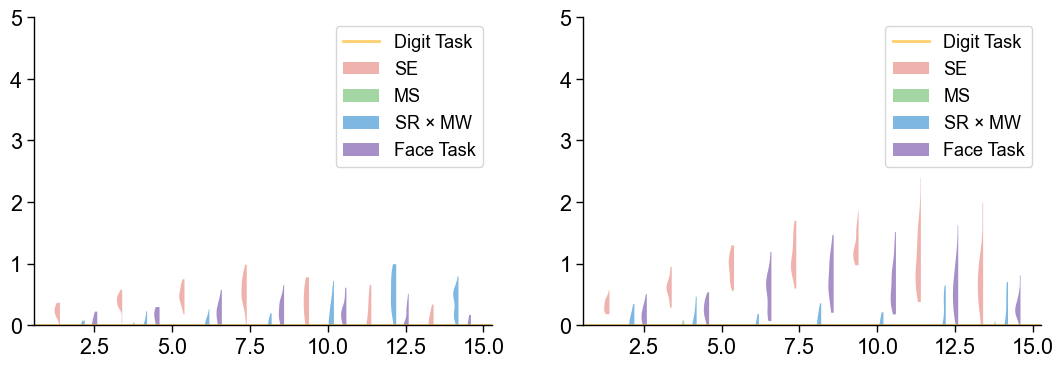

In [4]:
fig,axes = plt.subplots(1,2,figsize=(13,4),gridspec_kw={'wspace': 0.2})
type = ['Digit Task','SE','MS',r'SR $\times$ MW',r'Face Task']
cms4=['#ed9f98','#8dcc8c','#5ea6db',cms[1]]
alpha0=0.6
ngroup=len(type)-1;xgap = 2; nxl = len(roi_labels); w = 0.8/ngroup*xgap
x = np.linspace(xgap,xgap*nxl,nxl)
ylims = [[-1.5,1.5],[-0.6,2.6]]
ytks = [[-1,0,1],[-1,0,1,2]]
pys = [[0.12,0.07],[0.12,0.08]]
parts = []
roi_i=0
for nf_i in range(len(nf)):
    l1 = axes[nf_i].axhline(y=0, color=cms[0], linestyle='-',linewidth=2,zorder=2, alpha=0.8)     # digit     
    parts.append(l1)
    data_m = np.zeros([len(roi_labels),ngroup])
    data_e = np.zeros([2,len(roi_labels),ngroup])
    data = deltaIlog_stw_subj_nf[:,nf_i,:,:]
    for ng in range(ngroup):
        [data_m[:,ng],data_e[:,:,ng],bsample] = stat_m_e(data[:,:,ng],mtype='mean',etype='sem')
        vp1 = axes[nf_i].violinplot(data[:,:,ng], positions = x-0.6+ng*0.4, vert = True, widths = w*0.85, 
                        points = 100, bw_method = 'scott', side = 'low', 
                    showmeans = False, showextrema = False, showmedians = False, quantiles = None)
        for b1 in vp1['bodies']:
            b1.set_facecolor(cms4[ng])
            b1.set_alpha(0.8)
        parts.append(b1)
    axes[nf_i].legend(parts,type)
    axes[nf_i].set_ylim([0,5])
fig.savefig('fig6-legend.pdf')